In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   
import json

from mlca_for_elec.env.env import *
import os

In [2]:
print("Start loading household profiles")
folder_path = "../config\experiment1\households"
houses = []
for file in os.listdir(folder_path)[:3]:
    if file.endswith(".json"):
        household = json.load(open(folder_path+"/"+ file))
    house = HouseHold(household)

    generation_path = "../data\solar_prod\Timeseries_55.672_12.592_SA2_1kWp_CdTe_14_44deg_-7deg_2020_2020.csv"
    consumption_path = f"../data/consumption/Reference-{house.param['consumption']['type']}.csv"
    spot_price_path = "../data/spot_price/2020.csv"
    fcr_price_path = "../data/fcr_price/random_fcr.csv"
    house.load_data(generation_path,consumption_path, spot_price_path,fcr_price_path)
    for i in range(205):
        house.next_data()
    houses.append(house)
print(f"Loaded {len(houses)} households")
print("Start compute social welfare")
print(houses[0].data['consumption'])
microgrid_1 =json.load(open("../config\microgrid_profile\default_microgrid.json"))
MG = Microgrid(houses, microgrid_1)

Start loading household profiles
0
1
2
Loaded 3 households
Start compute social welfare
0     2.0
1     2.0
2     1.0
3     1.0
4     1.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    3.0
15    5.0
16    6.0
17    7.0
18    7.0
19    8.0
20    6.0
21    5.0
22    3.0
23    2.0
Name: consumption, dtype: float64


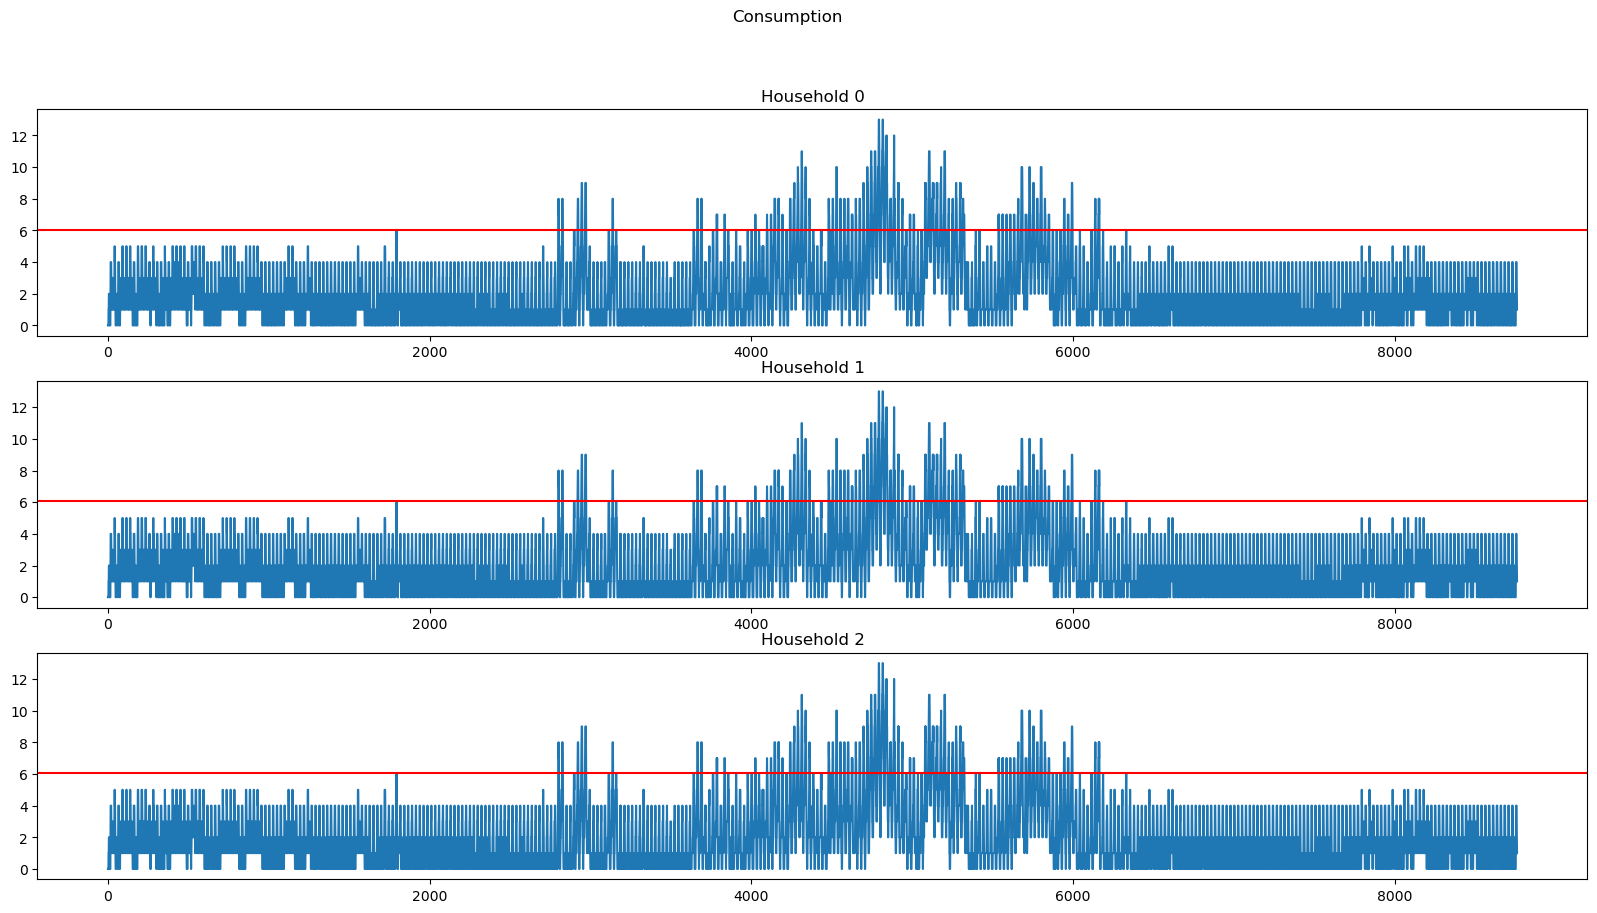

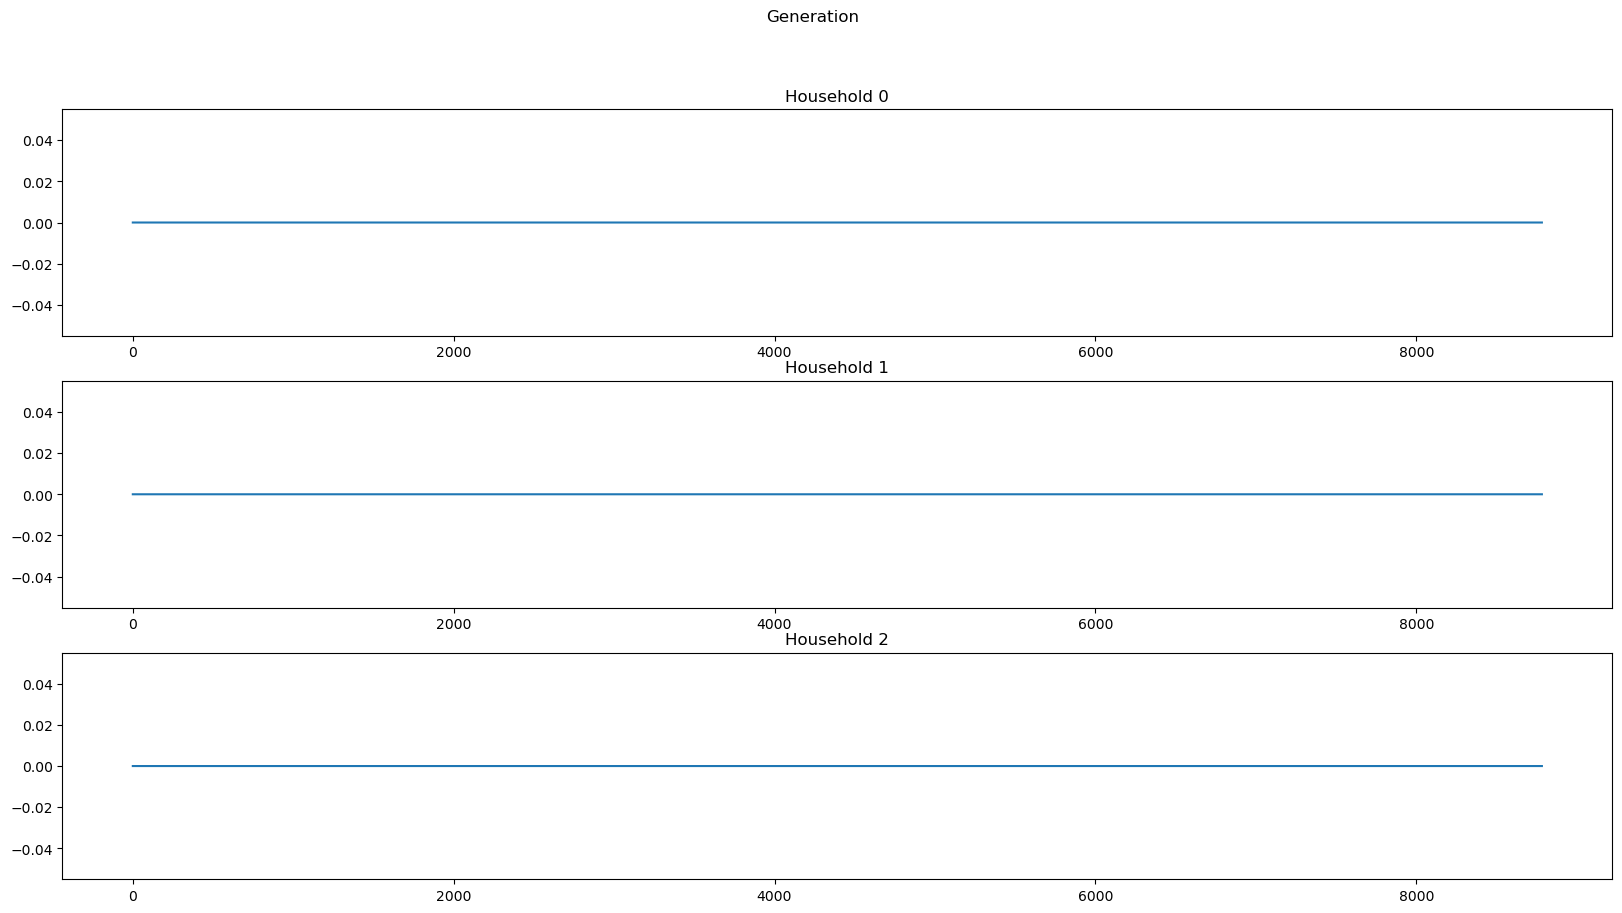

In [6]:
# plot data per houses 
fig, ax = plt.subplots(len(MG.households),1, figsize = (20,10))
for i,house in enumerate(MG.households):
    ax[i].plot(house.df['consumption'], label = "consumption")
    ax[i].set_title(f"Household {house.ID}")
    ax[i].axhline(house.df['consumption'].quantile(0.95), color = "red", label = "mean")
plt.suptitle("Consumption")
plt.show()

# plot data per houses 
fig, ax = plt.subplots(len(MG.households),1, figsize = (20,10))
for i,house in enumerate(MG.households):
    ax[i].plot(house.df['generation'], label = "Generation")
    ax[i].set_title(f"Household {house.ID}")
plt.suptitle("Generation")
plt.show()

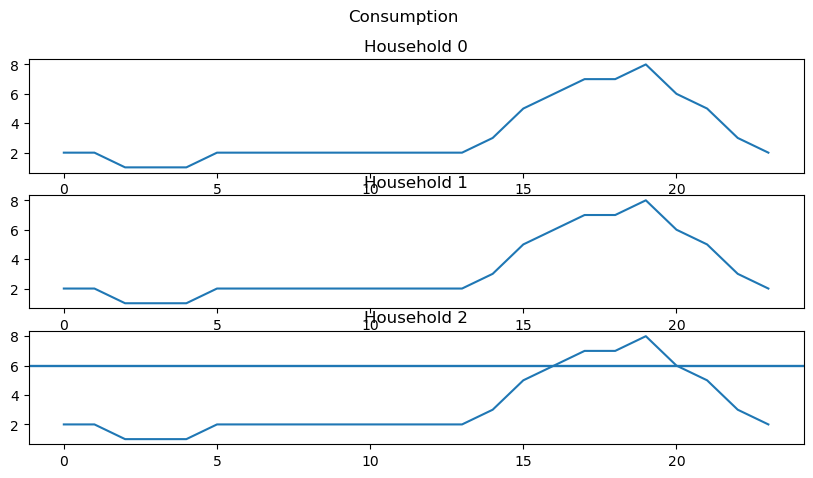

In [4]:
# plot data per houses 
fig, ax = plt.subplots(len(MG.households),1, figsize = (10,5))
for i,house in enumerate(MG.households):
    ax[i].plot(house.data['consumption'], label = "consumption")
    ax[i].set_title(f"Household {house.ID}")
    plt.axhline(6)
plt.suptitle("Consumption")
plt.axhline(6)
plt.show()
